In [136]:
#import libs
import pandas as pd
import matplotlib
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

ts = pd.read_csv('/home/alessio/Scaricati/cpu_utilizzata.csv', header=0, parse_dates=[0], index_col=0)
tsr = ts.resample(rule='30S').mean()

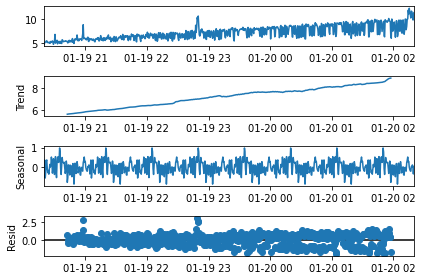

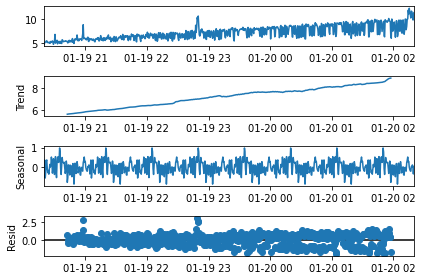

In [160]:
#Work on TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='add', period=90)
result
data = result.trend.dropna()
result.plot()

In [161]:
data

Time
2022-01-19 20:42:30    5.596444
2022-01-19 20:43:00    5.605944
2022-01-19 20:43:30    5.613222
2022-01-19 20:44:00    5.619333
2022-01-19 20:44:30    5.623222
                         ...   
2022-01-20 01:55:30    8.882778
2022-01-20 01:56:00    8.905722
2022-01-20 01:56:30    8.917556
2022-01-20 01:57:00    8.922944
2022-01-20 01:57:30    8.934722
Freq: 30S, Name: trend, Length: 631, dtype: float64

In [162]:
#Split training and test data (90/10)
train = data.iloc[:567]
test = data.iloc[567:] 

In [163]:
from pmdarima import auto_arima
auto_arima(data)

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True)

In [164]:
model = ARIMA(train, order=(5,1,5))

In [165]:
results = model.fit()

In [166]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  567
Model:                 ARIMA(5, 1, 5)   Log Likelihood                2258.135
Date:                Sun, 23 Jan 2022   AIC                          -4494.270
Time:                        15:52:35   BIC                          -4446.545
Sample:                    01-19-2022   HQIC                         -4475.643
                         - 01-20-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9195      0.198      9.716      0.000       1.532       2.307
ar.L2         -2.3275      0.312     -7.462      0.000      -2.939      -1.716
ar.L3          2.1887      0.320      6.839      0.000       1.561       2.816
ar.L4         -1.0968      0.288     -3.814      0.000      -1.660      -0.533
ar.L5          0.3108      0.090      3.471      0.001       0.135       0.486
ma.L1         -0.4879      0.196     -2.487      0.013      -0.872      -0.103
ma.L2          0.0494      0.055      0.895      0.371      -0.059       0.158
ma.L3          0.2875      0.050      5.780      0.000       0.190       0.385
ma.L4         -0.8198      0.060    -13.555      0.000      -0.938      -0.701
ma.L5          0.1777      0.160      1.111      0.266      -0.136       0.491
sigma2      1.977e-05   1.06e-06     18.662      0.000    1.77e-05    2.18e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):                78.34
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

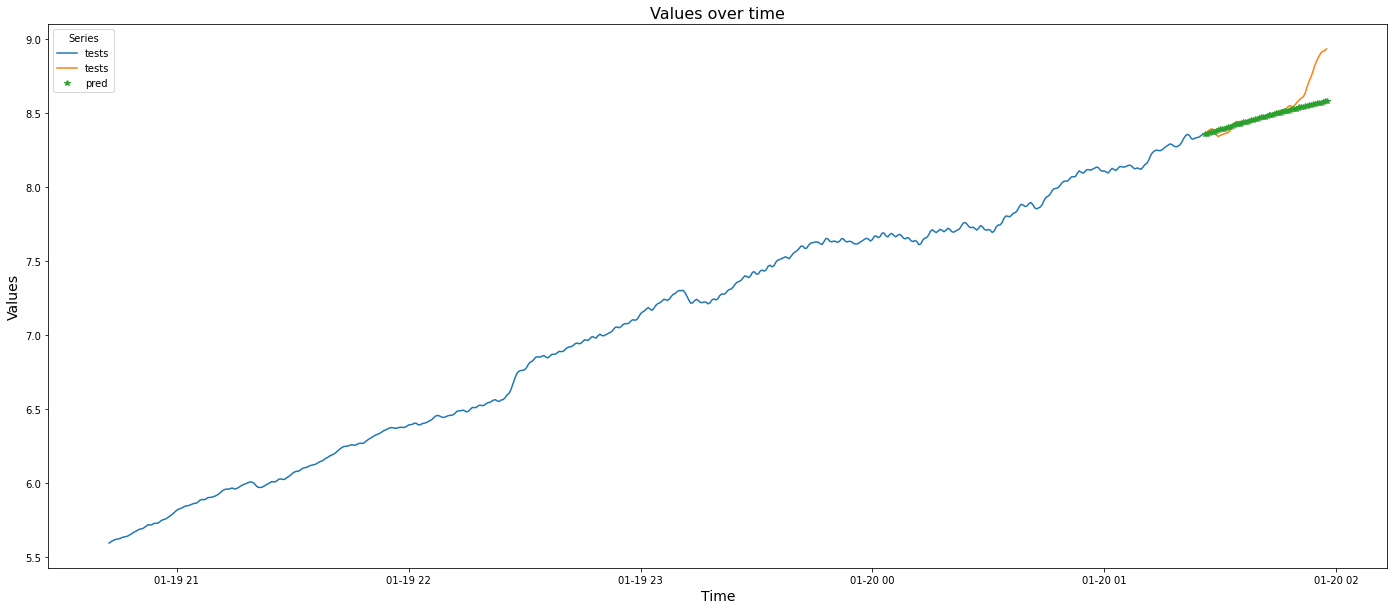

In [168]:
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(train, "-", label = 'tests')
plt.plot(test, "-", label = 'tests')
plt.plot(predictions,"*", label='pred')

plt.legend(title='Series')

In [169]:
model = ARIMA(data, order=(5,1,5))

In [170]:
results = model.fit()

/home/alessio/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/alessio/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [171]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                  631
Model:                 ARIMA(5, 1, 5)   Log Likelihood                2365.486
Date:                Sun, 23 Jan 2022   AIC                          -4708.971
Time:                        15:52:42   BIC                          -4660.068
Sample:                    01-19-2022   HQIC                         -4689.976
                         - 01-20-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9653      0.418      2.311      0.021       0.147       1.784
ar.L2         -0.3090      0.440     -0.702      0.483      -1.172       0.554
ar.L3         -0.0333      0.452     -0.074      0.941      -0.920       0.853
ar.L4          0.7087      0.361      1.962      0.050       0.001       1.416
ar.L5         -0.4982      0.198     -2.521      0.012      -0.885      -0.111
ma.L1          0.3993      0.412      0.970      0.332      -0.408       1.206
ma.L2         -0.1506      0.348     -0.433      0.665      -0.832       0.531
ma.L3          0.2986      0.263      1.135      0.257      -0.217       0.814
ma.L4         -0.2030      0.294     -0.691      0.489      -0.778       0.373
ma.L5         -0.3579      0.175     -2.043      0.041      -0.701      -0.015
sigma2      3.246e-05   1.92e-06     16.923      0.000    2.87e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):                22.82
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

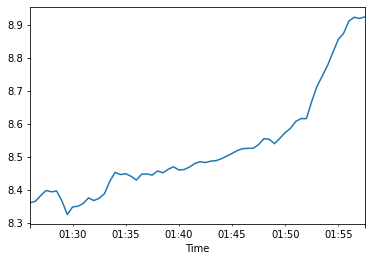

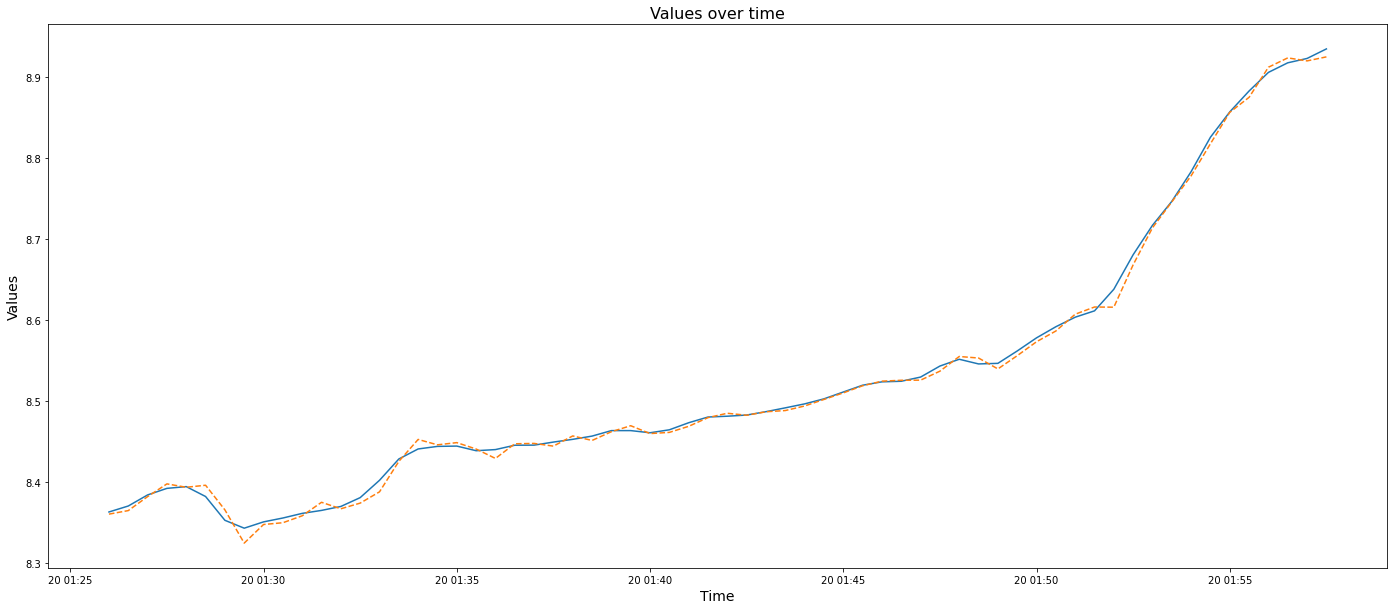

In [172]:
#Prediction
start = len(train)
end = start + len(test)-1
prediction1 = results.predict(start=start, end=end)
prediction1.plot()
plt.figure(figsize=(24,10))
#add axes labels and title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(test, "-", label = 'tests')
plt.plot(prediction1,"--", label='pred')

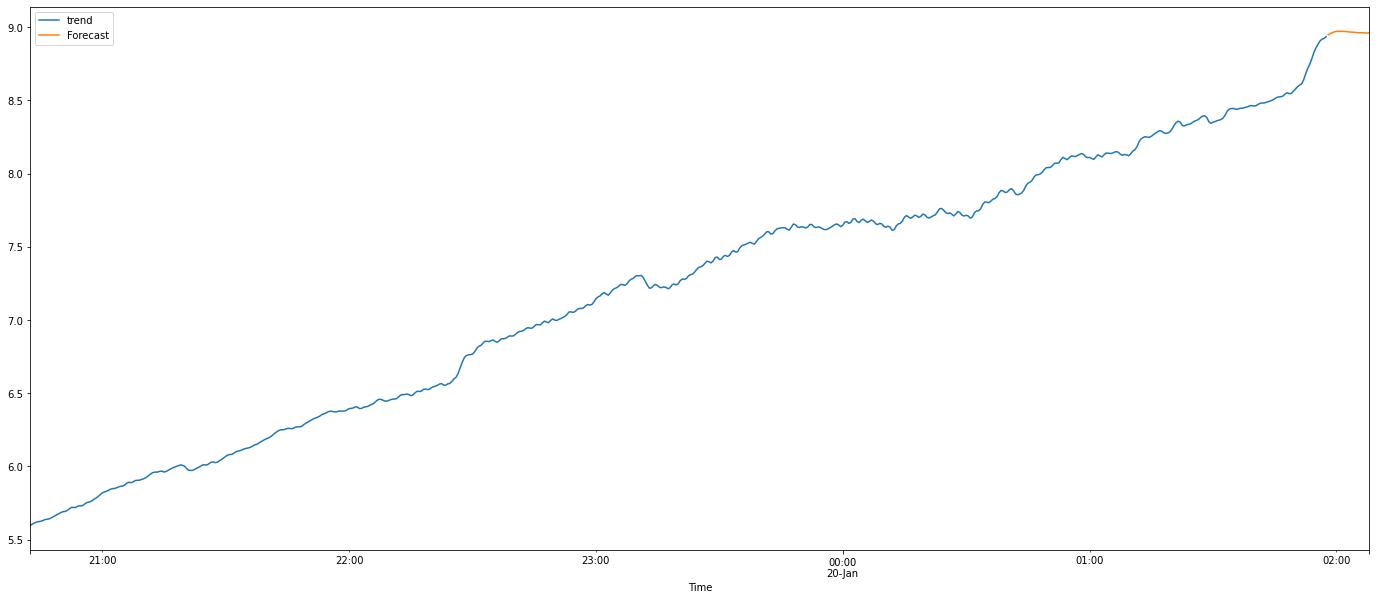

In [173]:
#make predictions
fcast = results.predict(start=len(data), end=(len(data)+20)).rename('Forecast')

#Plot the results
data.plot(legend=True)
fcast.plot(legend=True, figsize=(24,10));